<a href="https://colab.research.google.com/github/nmehta32/Pattern-Recognition-in-python/blob/main/KMeansVSGMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


p = pd.read_excel('/content/Q1-Data(1).xlsx')
p.head()


,X,Y
0,-30.7097,-24.1774
1,-27.3607,-23.5482
2,-30.0516,-27.6619
3,-31.6089,-27.0362
4,-37.9886,-24.5215


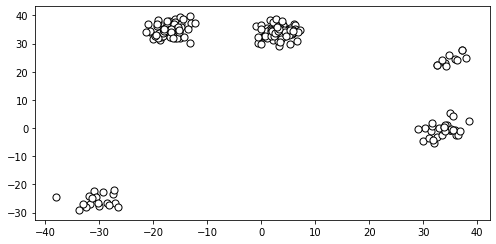

[[-30.41868947 -25.57280526]
 [ 33.73770667  -0.60638333]
 [  3.34338961  34.16328961]
 [-16.8944127   34.99264762]
 [ 35.10477273  24.50536364]]


In [50]:
plt.scatter(
   p['X'], p['Y'],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

#5 cluster Centers


km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit(p)

print(y_km.cluster_centers_)


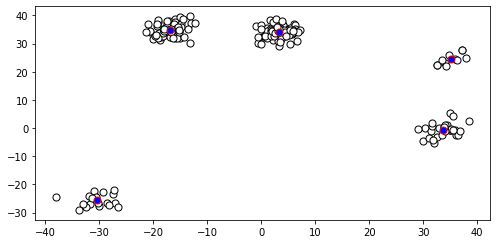

In [51]:
cc = y_km.cluster_centers_

plt.scatter(
   p['X'], p['Y'],
   c='white', marker='o',
   edgecolor='black', s=50
)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
for i in range(len(cc)):
  plt.plot(cc[i][0], cc[i][1], marker="o", markersize=7, markeredgecolor="red", markerfacecolor="blue")
plt.show()


In [52]:
##Implemeing Gausian Mixture modeling
from sklearn.mixture import GaussianMixture
from scipy.optimize import curve_fit

GMM = GaussianMixture(n_components=5, random_state=0).fit(p)

print(GMM.means_)

[[ 33.73770667  -0.60638333]
 [  3.34338961  34.16328961]
 [-30.41868947 -25.57280526]
 [-16.8944127   34.99264762]
 [ 35.10477273  24.50536364]]


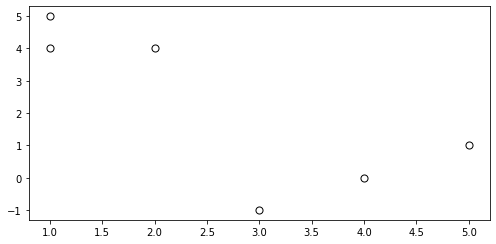

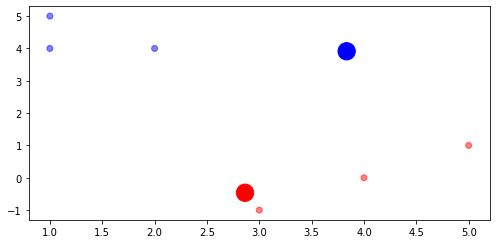

In [53]:
## q2  K means manually
import numpy as np
import random

data = np.array([[1 ,5],[2, 4],[1, 4],[4, 0],[5 ,1],[3 ,-1]])

data = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1]})

plt.scatter(
   data['X'], data['Y'],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

## K = 2
def initialize_centroids(k, data):

    n_dims = data.shape[1]
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids

centroids = initialize_centroids(2, data)
centroids
def calculate_error(a,b):
    '''
    Given two Numpy Arrays, calculates the root of the sum of squared errores.
    '''
    error = np.square(np.sum((a-b)**2))

    return error

errors = np.array([])
for centroid in range(centroids.shape[0]):
    error = calculate_error(centroids.iloc[centroid, :2], data.iloc[0,:2])
    errors = np.append(errors, error)

errors

np.where(errors == np.amin(errors))[0].tolist()[0]

def assign_centroid(data, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

data['centroid'], data['error'] = assign_centroid(data.iloc[:,:2] ,centroids)
data[['centroid', 'error']].head()


colors = {0:'red', 1:'blue', 2:'green'}

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

In [47]:
data['error'].sum()

data_columns = ['X','Y']

centroids = data.groupby('centroid').agg('mean').loc[:,data_columns].reset_index(drop = True)
centroids

,X,Y
0,1.333333,4.333333
1,4.000000,0.000000


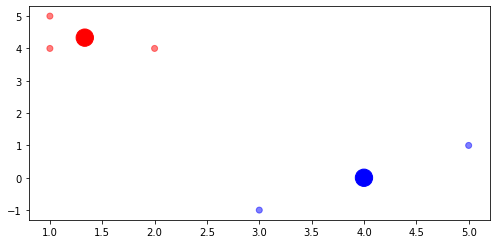

In [48]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

In [54]:
def knn(data, k):
    '''
    Given a dataset and number of clusters, it clusterizes the data. 
    data: a DataFrame with all information necessary
    k: number of clusters to create
    '''

    # Initialize centroids and error
    centroids = initialize_centroids(k, data)
    error = []
    compr = True
    i = 0

    while(compr):
        # Obtain centroids and error
        data['centroid'], iter_error = assign_centroid(data,centroids)
        error.append(sum(iter_error))
        # Recalculate centroids
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)

        # Check if the error has decreased
        if(len(error)<2):
            compr = True
        else:
            if(round(error[i],3) !=  round(error[i-1],3)):
                compr = True
            else:
                compr = False
        i = i + 1 

    data['centroid'], iter_error = assign_centroid(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    return (data['centroid'], iter_error, centroids)

data['centroid'], _, centroids =  knn(data.drop(['centroid','error'], axis = 1),3)
data['centroid'].head()        

0    1
1    1
2    1
3    0
4    0
Name: centroid, dtype: int64